In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [2]:
iris = pd.read_csv("iris.csv")
iris.head()

,S_length,S_width,P_length,P_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris["class"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

Index(['S_length', 'S_width', 'P_length', 'P_width', 'class'], dtype='object')


<AxesSubplot:xlabel='P_length', ylabel='S_width'>

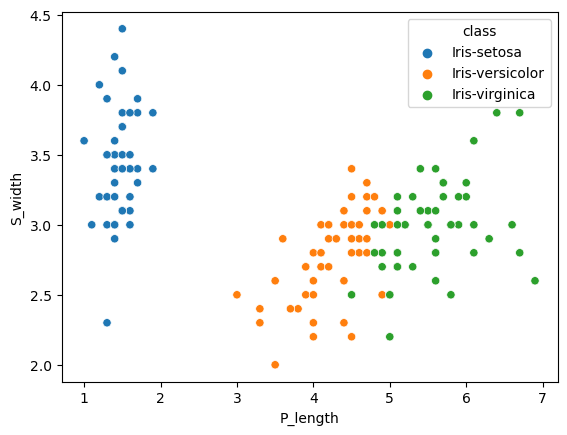

In [4]:

# Step 1: Verify column names in the 'iris' DataFrame
print(iris.columns)

iris['class'] = iris['class'].astype(str)

# Step 4: Create the scatter plot using Seaborn scatterplot function
sns.scatterplot(data=iris, x='P_length', y='S_width', hue='class')

In [5]:
flower_mapping = {'Iris-setosa': 0 , 'Iris-versicolor' : 1 , 'Iris-virginica' : 2 }
iris['class'] = iris['class'].map(flower_mapping)

iris.head()


,S_length,S_width,P_length,P_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
# Step 1: Separate features (X) and target (y)
X = iris.drop('class', axis=1)
y = iris['class']


In [7]:
model = LogisticRegression()

model.fit(X,y)

LogisticRegression()

In [8]:
model.score(X,y)

0.9733333333333334

In [9]:
expect = y
predict = model.predict(X)
predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [10]:
print(metrics.classification_report(expect,predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [11]:
print(metrics.confusion_matrix(expect , predict))

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


In [12]:

# Standardize the features (optional but can be beneficial for regularization)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Create the Logistic Regression model
model = LogisticRegression(C=10,penalty='l2')

# Train the model on the entire data
model.fit(X, y)

# Make predictions on the entire data
y_pred = model.predict(X)

# Evaluate the model's performance
accuracy = metrics.accuracy_score(y, y_pred)
conf_matrix = metrics.confusion_matrix(y, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.98
Confusion Matrix:
[[50  0  0]
 [ 0 48  2]
 [ 0  1 49]]
